# Price Prediction of an online marketplace 

## Introduction 

In this project, the goal is to predict the price of items that are listed on Mercari marketplace so that when a seller attempts to place their items on the website, they get a suggested price automatically. In the first phase of the project, we start by looking into the data sets we are given. The sets are from www.kaggle.com and the sets are found here: 
https://www.kaggle.com/saitosean/mercari/version/1
Since the data set is from Kaggle, the test set does not have the price. Therefore, we will only work with the train set and in the Machine Learning phase, we will split the train set into test and train. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import scipy as sp
import math
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
#import contractions
import unicodedata
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
import pylab
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.weightstats import ztest
from matplotlib import rcParams
import xlrd
import csv  
import os

In [2]:
f_1 = open(os.path.expanduser('~/Downloads/mercari/test.tsv'))

In [2]:
f_2 = open(os.path.expanduser('~/Downloads/mercari/train.tsv'))

In [4]:
df_1 = pd.read_csv(f_1, sep="\t")

In [5]:
df_1.columns

Index(['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object')

#### The following are a brief explanation of the attributes we have in our dataset: 
+ train_id — the id of the listing (we will drop this column in the next cells, mainly to reduce dimentionality since it won't serve us in our study)
+ name — the title of the listing as it appears on the item profile. 
+ item_condition_id — the condition of the items provided by the sellers; 1 is New With Tags, all the way to 5 as the condition gets worse. 
+ category_name — category of the listing (we will split up the category name in this project to create more similarities in seemingly different categories). 
+ brand_name — the name of the brand for the item on sale. 
+ price — the price that the item was sold for. This is target variable that we will predict in this study. 
+ shipping — 1 if shipping fee is paid by seller and 0 if shipping is paid by buyer
+ item_description — the full description of the item as it appears on the item profile. 

#### Let's look through the data sets and see the tables visually. 

In [6]:
df_1.dtypes

test_id               int64
name                 object
item_condition_id     int64
category_name        object
brand_name           object
shipping              int64
item_description     object
dtype: object

In [7]:
df_1.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material ..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and perfect for hot weather
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. ❤ ❤ Bundle and save! ❤ ❤ Book, death, grief, bereavement SHLF.SW.5.15"


In [8]:
df_1 = df_1.drop(['test_id'], axis=1)

In [9]:
df_1.describe()

,item_condition_id,shipping
count,693359.000000,693359.000000
mean,1.906102,0.447719
std,0.903378,0.497260
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,5.000000,1.000000


In [10]:
df_1.shape

(693359, 6)

In [11]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 6 columns):
name                 693359 non-null object
item_condition_id    693359 non-null int64
category_name        690301 non-null object
brand_name           397834 non-null object
shipping             693359 non-null int64
item_description     693359 non-null object
dtypes: int64(2), object(4)
memory usage: 31.7+ MB


# Exploratory Data Analysis 

+ The Train set has a price attribute, which we mainly focus on during this project.  
+ In the next following cells, we start looking into different attributes in the Train data set and start exploring the data.

In [3]:
df_2 = pd.read_csv(f_2, sep="\t")

We can see that the attributes are the following: 

In [13]:
df_2.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In the next cells, we will drop the `train_id` feature. 

In [14]:
df_2.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [15]:
df_2.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52.0,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
df_2 = df_2.drop(['train_id'], axis=1)


In [17]:
df_2.describe()

,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06
mean,1.907380e+00,2.673752e+01,4.472744e-01
std,9.031586e-01,3.858607e+01,4.972124e-01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+01,0.000000e+00
50%,2.000000e+00,1.700000e+01,0.000000e+00
75%,3.000000e+00,2.900000e+01,1.000000e+00
max,5.000000e+00,2.009000e+03,1.000000e+00


In [18]:
df_2.shape

(1482535, 7)

In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 7 columns):
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 79.2+ MB


Looking at the data types, it looks like everything is in the type we want it to be. Now, let's look into the different attributes more closely. 

In [20]:
df_2['name'].unique()

array(['MLB Cincinnati Reds T Shirt Size XL',
       'Razer BlackWidow Chroma Keyboard', 'AVA-VIV Blouse', ...,
       '21 day fix containers and eating plan', 'World markets lanterns',
       'Brand new lux de ville wallet'], dtype=object)

In [21]:
len(df_2['name'].unique())

1225273

We have over one million unique names in our data set. 

In [22]:
df_2['brand_name'].unique()

array([nan, 'Razer', 'Target', ..., 'Astroglide', 'Cumberland Bay',
       'Kids Only'], dtype=object)

In [23]:
len(df_2['brand_name'].unique())

4810

The following is the top 5 brand names in our data. 

In [24]:
df_2['brand_name'].value_counts().head()

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
Name: brand_name, dtype: int64

### Top 20 brand names are as follows:

In [25]:
df_2['brand_name'].value_counts()[:10]
                               

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
FOREVER 21           15186
Nintendo             15007
Lululemon            14558
Michael Kors         13928
American Eagle       13254
Name: brand_name, dtype: int64

Now, let's take a look at the `item_condition_id` attribute in the dataset. The `item_condition_id` goes from 1 to 5 in the order of New With Tags to Used. 

In [26]:
df_2['item_condition_id'].unique()

array([3, 1, 2, 4, 5])

In [27]:
len(df_2['item_condition_id'].unique())

5

Now, let's look at the `shipping` attribute in the data set.  The shipping status of 0 means that the shipping fee is by the buyer and shipping status of 1 means that the shipping fee is paid by the seller. 

In [28]:
df_2['shipping'].unique()

array([1, 0])

In [29]:
len(df_2['price'].unique())

828

There are 828 unique prices in the `price` feature, with the max, min, mean and standard deviation of: 

In [30]:
df_2['price'].max()

2009.0

In [31]:
df_2['price'].min()

0.0

In [32]:
df_2['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

Now, let's take a look at the `category_name` in the data set.

In [33]:
df_2['category_name'].unique()

array(['Men/Tops/T-shirts',
       'Electronics/Computers & Tablets/Components & Parts',
       'Women/Tops & Blouses/Blouse', ..., 'Handmade/Jewelry/Clothing',
       'Vintage & Collectibles/Supplies/Ephemera',
       'Handmade/Pets/Blanket'], dtype=object)

In [34]:
len(df_2['category_name'].unique())

1288

The following is the top 5 `category_name` in the data: 

In [35]:
df_2['category_name'].value_counts().head()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

The list of the top 20 'category_name' in the marketplace in the descending order is:  

In [36]:
df_2['category_name'].value_counts().head()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

As we can see, almost all these categories are a few subcategories bundled up together. In the next cells, we are planning to take them apart in the next few phases of this project. 

Now, let's take a look at the `shipping` attribute: 

In [37]:
df_2['shipping'].unique()

array([1, 0])

There are 2 types of `shipping` corresponding to: 
#### Free Shipping, yes --> 1
#### Free Shipping, no --> 0

In [38]:
df_2['shipping'].value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

As we see, we have the following ratio for different types of `shipping`s. 

In [39]:
df_2['shipping'].value_counts()/len(df_2['shipping'])

0    0.552726
1    0.447274
Name: shipping, dtype: float64

About 45% of the items are free shipping. 

In [40]:
len(df_2['shipping'] == 1) + len(df_2['shipping'] == 0)   

2965070

Let's delve into the different types of `shipping` and see the average `price` of different `shipping` types; As we see, the average `price` for free `shipping` is $22.57. 

While, the average `price` when the buyer pays for `shipping` is  $30.11.

In [41]:
df_2.loc[df_2['shipping']==0, 'price'].mean()  #buyer pays the shipping

30.111777627267568

In [42]:
df_2.loc[df_2['shipping']==1, 'price'].mean()  #seller pays the shipping

22.56772583320766

In [43]:
df_2['price'].sort_values(ascending=False).head()

760469     2009.0
1262245    2006.0
1393600    2004.0
1445348    2000.0
742113     2000.0
Name: price, dtype: float64

In [44]:
df_2.groupby(['shipping']).describe()

item_condition_id                                               \
                     count      mean       std  min  25%  50%  75%  max   
shipping                                                                  
0                 819435.0  2.062683  0.897946  1.0  1.0  2.0  3.0  5.0   
1                 663100.0  1.715462  0.872159  1.0  1.0  1.0  2.0  5.0   

             price                                                      
             count       mean       std  min   25%   50%   75%     max  
shipping                                                                
0         819435.0  30.111778  39.53592  0.0  13.0  20.0  33.0  2009.0  
1         663100.0  22.567726  36.95579  0.0   8.0  14.0  25.0  2000.0

##### Let's see how many missing values we have in our dataset in our various attributes. 

In [45]:
df_2.isnull().sum()

name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

# Data Visualization

In this phase of the project, we visualize the data through different types of graphs. 

#### The bar graphs of top`brand_name`  in the marketplace based on the data set we are working with: 

Text(0.5, 0, 'Number of posts per brand name')

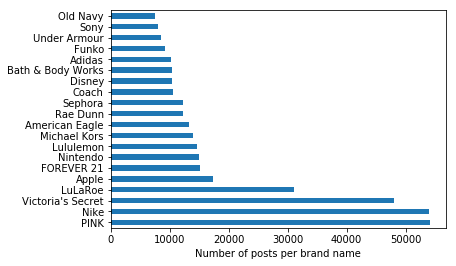

In [50]:
df_2['brand_name'].value_counts()[:20].plot(kind='barh')  
plt.xlabel('Number of posts per brand name')   

Text(0.5, 0, 'Number of posts per brand name')

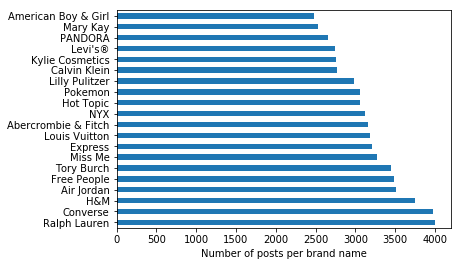

In [51]:
df_2['brand_name'].value_counts()[40:60].plot(kind='barh')  
plt.xlabel('Number of posts per brand name') 

Text(0.5, 0, 'Number of posts per brand name')

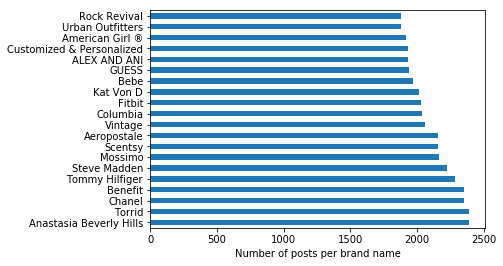

In [52]:
df_2['brand_name'].value_counts()[60:80].plot(kind='barh')  
plt.xlabel('Number of posts per brand name') 

Text(0.5, 0, 'Number of posts per brand name')

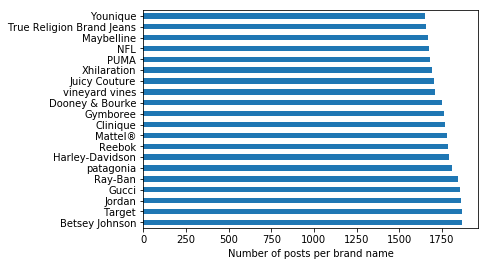

In [53]:
df_2['brand_name'].value_counts()[80:100].plot(kind='barh')  
plt.xlabel('Number of posts per brand name') 

#### Histogram of the distribution of price in the data set: 

#### As we can see from the left histogram, the price is skewed to the right. The right histogram shows the logarithm of the attribute `price` and we see that it's normally distributed. 

Text(0.5, 1.0, 'Price Distribution')

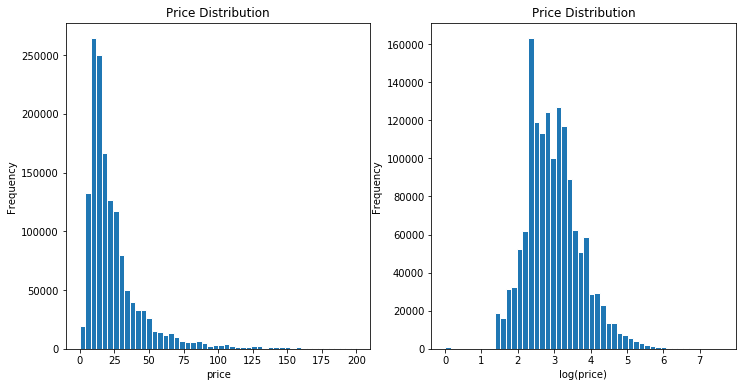

In [54]:
plt.subplot(1, 2, 1)
(df_2['price']).plot.hist(bins=50, range = [0, 200], edgecolor = 'white')  
plt.xlabel('price')   
plt.title('Price Distribution')
plt.subplot(1, 2, 2)
np.log(df_2['price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white' ) 
plt.xlabel('log(price)')  
plt.title('Price Distribution')

#### Now, let's see the relationship between `price` and the top `category_name`: 

In [55]:
df_2[df_2['category_name'] == 'Women/Athletic Apparel/Pants, Tights, Leggings']['price'].max()  
#max price in that category 


600.0

In [56]:
df_2[df_2['category_name'] == 'Women/Athletic Apparel/Pants, Tights, Leggings']['price'].describe()
# more stats about the Women/Athletic category: 

count    60177.000000
mean        34.392733
std         24.404239
min          0.000000
25%         18.000000
50%         29.000000
75%         44.000000
max        600.000000
Name: price, dtype: float64

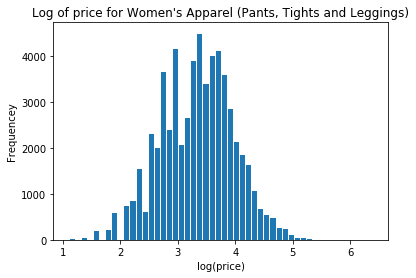

In [58]:
plt.hist(np.log(df_2[df_2['category_name'] == 'Women/Athletic Apparel/Pants, Tights, Leggings']['price'][df_2['price'] != 0]),bins=50, edgecolor='white')  
# and it's a normal distribution!
#the log tranform of it makes it noraml distributed  #when in doubt take a log! lol 
plt.title("Log of price for Women's Apparel (Pants, Tights and Leggings)")
plt.xlabel('log(price)')  
plt.ylabel("Frequencey")
plt.show()


#### The violin distribution for `price`: 

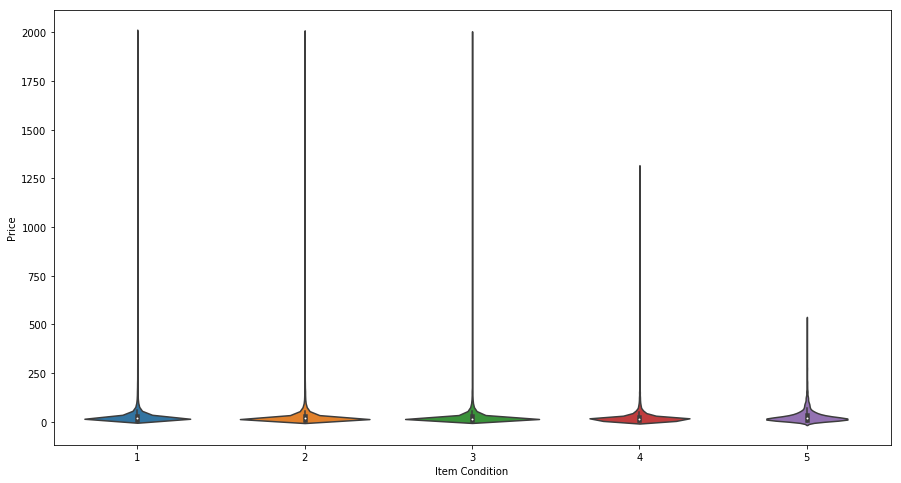

In [53]:
plt.figure(figsize=(15,8)) 
sns.violinplot( y = df_2.price, x= df_2['item_condition_id'])
plt.xlabel('Item Condition')
plt.ylabel('Price')
plt.show()

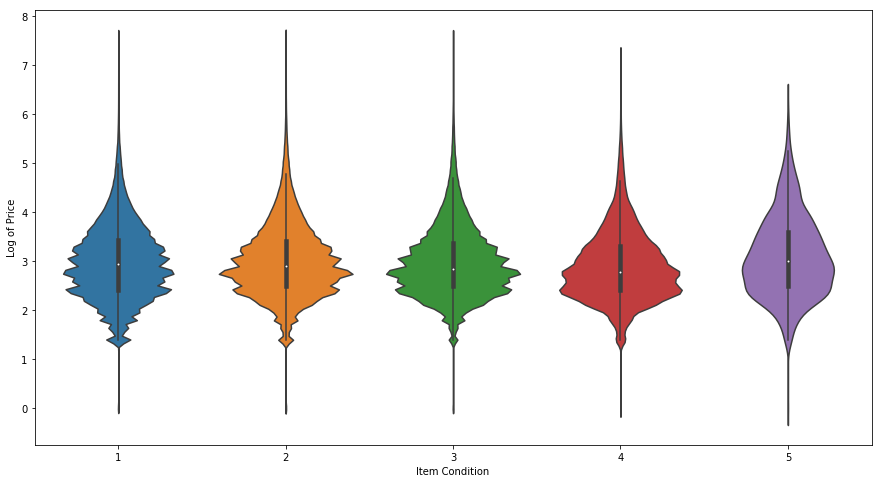

In [54]:
plt.figure(figsize=(15,8)) 
sns.violinplot( y = np.log(df_2['price'] +1) , x= df_2['item_condition_id'], data = df_2)
plt.xlabel('Item Condition')
plt.ylabel('Log of Price')
plt.show()

#### Box Plots of log of `price` and the `item_condition_id`: 

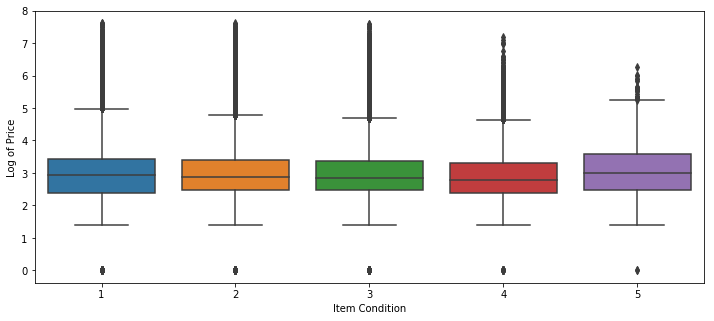

In [55]:
plt.figure(figsize=(12,5)) 
sns.boxplot(x ='item_condition_id', y = np.log(df_2['price']+1), data = df_2)
plt.xlabel('Item Condition')
plt.ylabel('Log of Price')
plt.show()

#### Top most `price` s in the marketplace: 

In [10]:
df_2.price.value_counts().head()


10.0    99416
12.0    78986
14.0    76655
16.0    66413
9.0     63643
Name: price, dtype: int64

In [55]:
len(df_2[df_2['price'] < 250.0])


1476089

In [56]:
len(df_2[df_2['price'] < 100.0])

1438222

#### The following are various bar charts for the frequency of the `category_name` attribute. 

+ The main category name in the marketplace is Women Apparel/Pants, Tights, Leggings followed by Women/Tops & Blouses/T-Shirts.  

Text(0.5, 0, 'Number of posts per category name')

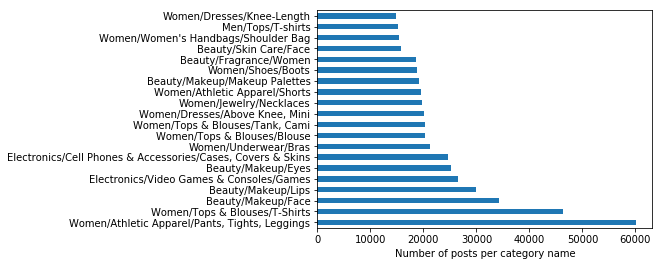

In [59]:
df_2['category_name'].value_counts()[:20].plot(kind='barh')  
plt.xlabel('Number of posts per category name')  

Text(0.5, 0, 'Number of posts per category name')

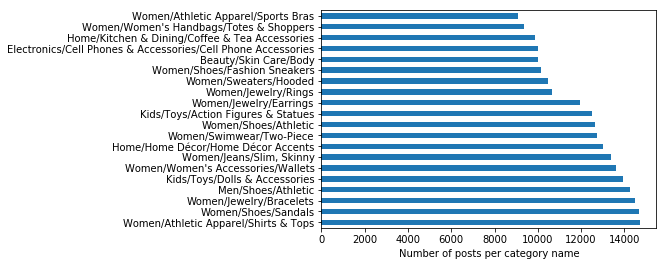

In [60]:
df_2['category_name'].value_counts()[20:40].plot(kind='barh') 
plt.xlabel('Number of posts per category name') 

Text(0.5, 0, 'Number of posts per category name')

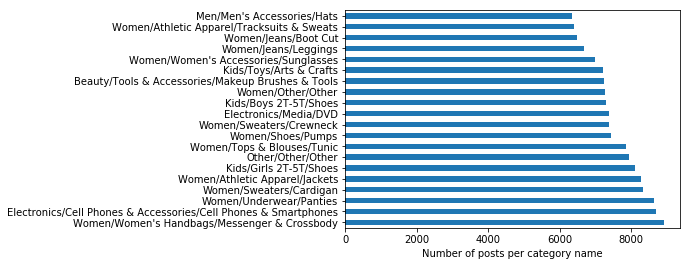

In [61]:
df_2['category_name'].value_counts()[40:60].plot(kind='barh')  
plt.xlabel('Number of posts per category name') 

Text(0.5, 0, 'Number of posts per category name')

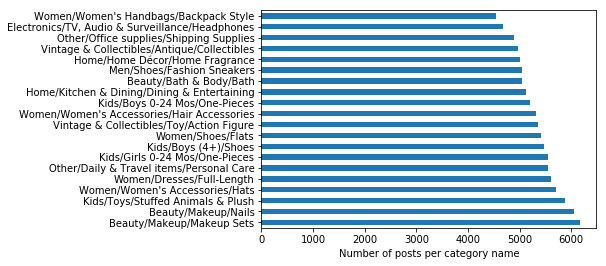

In [62]:
df_2['category_name'].value_counts()[60:80].plot(kind='barh')
plt.xlabel('Number of posts per category name') 

Text(0.5, 0, 'Number of posts per category name')

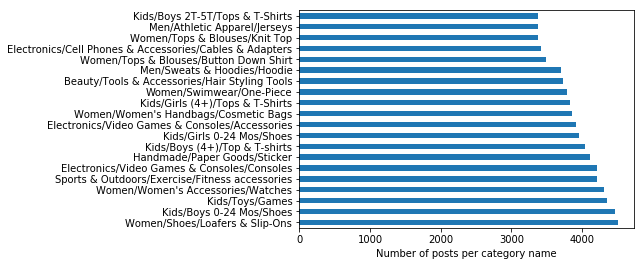

In [63]:
df_2['category_name'].value_counts()[80:100].plot(kind='barh')  
plt.xlabel('Number of posts per category name') 

Text(0.5, 0, 'Number of posts per category name')

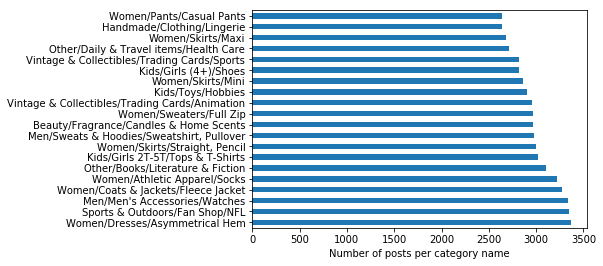

In [64]:
df_2['category_name'].value_counts()[100:120].plot(kind='barh')  
plt.xlabel('Number of posts per category name') 

#### The following is the graph of distributions of `price` for different `shipping` types 

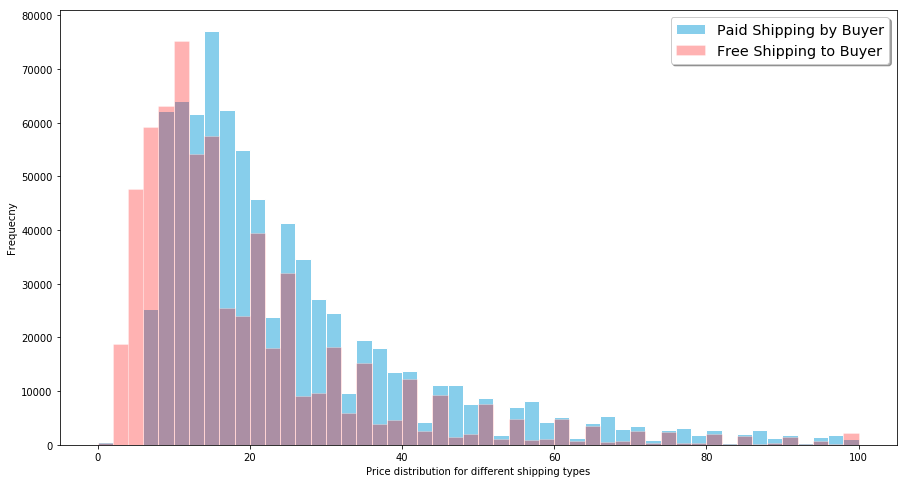

In [65]:
fig = plt.figure(figsize=(15,8)) 
plt.hist(df_2.loc[df_2['shipping']==0, 'price'], bins=50, edgecolor='white', range = [0, 100], color = "skyblue",  alpha=1.0, label='Paid Shipping by Buyer')
plt.hist(df_2.loc[df_2['shipping']==1, 'price'], bins=50, edgecolor='white', range = [0, 100], color = "red",  alpha=0.3, label='Free Shipping to Buyer')
plt.legend(loc='upper right', shadow=True,  fontsize='x-large')
plt.xlabel('Price distribution for different shipping types') 
plt.ylabel('Frequecny')
plt.show()

### Seems like, overall, the price of the items when it's free shipping is less expensive. Namely, more expensive items are paid by the buyer. 



### Let's take a look at how many rows have `price` =0


In [66]:
len(df_2[df_2['price'] == 0])

874

In [5]:
### We are going to drop these rows

df_2 = df_2[df_2['price'] != 0]

In [6]:
df_2.shape

(1481661, 7)

+ The following is the Null values for different attributes in the dataset. 
##### category_name    --->       6327
##### brand_name       --->    632682
##### item_description --->         4
 <br />
 
+ We are going to replace all the NaN's to noname in `brand_name` and then start preparing the dataset for machine learning. 

Here, I am replacing all the NaN's in `brand_name` and `categorgy_name` with "noname"

In [6]:
df_2['brand_name'] = df_2['brand_name'].replace(np.nan, 'noname')

In [7]:
df_2['category_name'] = df_2['category_name'].replace(np.nan, 'noname')

## Data Preparation for Machine Learning

#### Now, we convert the `category_name` , `item_condition_id` and `brand_name` columns into a dummie variable. 

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [9]:
cat_name = pd.get_dummies(pd.Series(df_2['category_name'].str.split('/')).apply(pd.Series).stack() ) .sum(level=0)

In [10]:
brand_name = pd.get_dummies(pd.Series(df_2['brand_name'].str.split('/')).apply(pd.Series).stack()).sum(level=0)

In order to get dummies for `item_condition_id`, we will convert 1 to 5 digits to object since `item_condition_id` is an integer. 

Now, the `item_condition_id` is a string. 

In [11]:
df_2['item_condition_id'] = df_2['item_condition_id'].astype(str)

In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481661 entries, 0 to 1482534
Data columns (total 7 columns):
name                 1481661 non-null object
item_condition_id    1481661 non-null object
category_name        1481661 non-null object
brand_name           1481661 non-null object
price                1481661 non-null float64
shipping             1481661 non-null int64
item_description     1481657 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 130.4+ MB


In [13]:
item_cond = pd.get_dummies(pd.Series(df_2['item_condition_id'].str.split('/')).apply(pd.Series).stack() ) .sum(level=0)

Since we’ve created a whole new dataframes with the get_dummies, in order to compare it to our original dataframe, we’re going to need to either merge or concatenate them to work with them properly. When creating dummy variables, we basically have created new columns for our original dataset. The old and new dataset don’t have any columns in common, so it would make most sense to concatenate them. 

In [14]:
df_concat = pd.concat((df_2, item_cond), axis = 1)

In [15]:
df = pd.concat((df_concat, cat_name), axis = 1)

In [16]:
df_ = pd.concat((df, brand_name), axis = 1)

get_dummies will create a separate data frame, we will then want to remove the `category_name`, `item_condition_id` as well as `brand_name` columns from the new data frame that we created. We used pd.concat() to join the data frames and now we use drop() to remove the 3 columns we have got the dummies for.  

In [17]:
df_new = df_.drop(columns = ['name','item_condition_id', 'category_name','brand_name', 'item_description'], axis=1) 


In [18]:
df_new.head()

,price,shipping,1,2,3,4,5,100 Years or Older,50 To 75 Years,75 To 100 Years,A-Line,"Above Knee, Mini",Accessories,Accessory,Aceo,Action Figure,Action Figures & Statues,"Action, Adventure",Activity Centers & Entertainers,Advertisement,Afghan,Air Conditioners,Air Fresheners,Air Purifiers,All Other Sports,Amplifiers & Effects,Animal,Animals,Animation,Antique,Apparel,Apron,Area Rugs & Pads,Art,Art Doll,Artist Bears,Arts & Crafts,Arts & Photography,Artwork,Asymmetrical,Asymmetrical Hem,Athletic,Athletic Apparel,Athletic Training,Automotive,Automotive Enthusiast Merchandise,Baby,Baby & Child Care,Baby & Toddler Toys,Baby Gyms & Playmats,Baby Seats,Backpack,Backpack Style,Backpacks & Carriers,"Backpacks, Bags & Briefcases",Badminton,"Baggy, Loose",Bags & Cases,Bags and Purses,Baguette,Bakeware,Ballet,Band & Orchestra,Baseball,Baseball & Softball,Basic Supplies,Basket,Basketball,Baskets,Baskets & Bins,Bass Guitars,Bath,Bath & Body,Bath Linen Sets,Bath Rugs,Bathing & Skin Care,Bathing Accessories,Bathing Tubs & Seats,Bathroom,Bathroom Accessories,Bathroom Furniture,Bathroom Furniture Sets,Bathroom Safety,Bathroom Shelves,Bathroom Storage & Organization,Batteries,Beach Accessories,Bead,Beading,Beads,Bear,Beauty,Bed,Bed Pillows,Bed in a Bag,Bedding,Bedroom Furniture,Bedspreads & Coverlets,Belt,Belts,Bicycle Child Seats & Trailers,Bike & Skate,Binoculars & Telescopes,Biographies & Memoirs,Biography,Birthday,Blanket,Blankets & Throws,Blazer,Blazers & Sport Coats,Block,Blouse,Blu-Ray,Board Shorts,"Board, Surf",Boating,Body,Bomber,Book,Bookmark,Books,Books and Zines,Boot Cut,Boots,Bottle-Feeding,Bottles,Bottoms,Bouquets,Bowl,Bowling,Bowls,Box,Boxes,Boxing & MMA,Boyfriend,Boys,Boys (4+),Boys 0-24 Mos,Boys 2T-5T,Bracelet,Bracelets,Bras,Brass Instruments,Breastfeeding,Breastfeeding Pillows & Stools,Brooch,Brushes,Brushes & Applicators,Bubble,Bubble Bath,Buckle,Building Toys,Burning,Business & Money,Butter Dish,Button,Button Down Shirt,Button-Front,CD,Cabinet Locks & Straps,Cables & Adapters,Cabochon,Cage,Cake Toppers,Calendar,Calendars,Camcorders,Camera,Camera & Photo Accessories,Cameras & Photography,Candle Holder,Candles,Candles & Holders,Candles & Home Scents,Cape,"Capri, Cropped","Capris, Cropped",Car,"Car Audio, Video & GPS",Car Care,Car Electronics & Accessories,Car Seats,Car Seats & Accessories,Car Security & Convenience,Car Speakers & Systems,Car Stereos & Components,Car Subwoofers,Car Video,Cardigan,Cards,Cargo,Carpenter,"Carpenter, Utility",Carving,Case,"Cases, Covers & Skins",Casserole,Casual Pants,Casual Shorts,Cell Phone Accessories,Cell Phones & Accessories,Cell Phones & Smartphones,Ceramic,Ceramics and Pottery,Chain,Chair,Change Purse,Changing Kits,Changing Pads & Covers,Chargers & Cradles,Charm,Child Friendly,Children,Children's Books,Christian Books & Bibles,Christmas,"Classic, Straight Leg",Cleaning,Cleaning Supplies,Cleansers,Cleats,Clock,Clocks,Cloth Diapers,Clothing,Clothing & Closet Storage,Clutch,Coaster,Coasters,Coats & Jackets,Coffee & Tea Accessories,Collages,Collar,Collared,Collectibles,Comforters & Sets,Comic,Comics,Compact,Competitive Swimwear,Components & Parts,Computers & Tablets,Conditioners,Consoles,Cookbook,Cookware,Corduroys,Corset,Cosmetic Bags,Costume,...,Warehouse,Waring,Warner Bros.,Warner Brothers,Warner Home Video,Warrior,Waterford,Waterpik,Waverly,We The Free,WeSC,WearFirst,Weather Tamer,Weatherproof,Weaver Leather,Weavers,Wedgwood,Weight Watchers,Wellness,Wembley,Wendy Bellissimo,West Bend,West Coast Choppers,West Elm,Westbound,Western Chief,Western Digital,Western Express,Weston,Wet Seal,Wet n Wild,Wham-O,Whirlpool,Whish,Whiskas,Whisker City,White + Warren,White Diamond,White House Black Market,White Mark,White Mountain,White Mountaineering,White Stag,Wigwam,Wild Diva,Wild Republic,Wildfox,Wildfox Couture,Wildkin,Willi Smith,William Rast,Williams Sonoma,Willow & Clay,Willow Tree,Wilson,Wilsons Leather,Wilton,Winchester,Windsor,Winner's Circle,Winterland,Wish,Wit & Wisdom,Wizards of the Coast,Wolfgang 

In [19]:
df_new_woPrice = df_new.drop(columns = ['price'], axis = 1) 

In [20]:
df_new_woPrice.head()

,shipping,1,2,3,4,5,100 Years or Older,50 To 75 Years,75 To 100 Years,A-Line,"Above Knee, Mini",Accessories,Accessory,Aceo,Action Figure,Action Figures & Statues,"Action, Adventure",Activity Centers & Entertainers,Advertisement,Afghan,Air Conditioners,Air Fresheners,Air Purifiers,All Other Sports,Amplifiers & Effects,Animal,Animals,Animation,Antique,Apparel,Apron,Area Rugs & Pads,Art,Art Doll,Artist Bears,Arts & Crafts,Arts & Photography,Artwork,Asymmetrical,Asymmetrical Hem,Athletic,Athletic Apparel,Athletic Training,Automotive,Automotive Enthusiast Merchandise,Baby,Baby & Child Care,Baby & Toddler Toys,Baby Gyms & Playmats,Baby Seats,Backpack,Backpack Style,Backpacks & Carriers,"Backpacks, Bags & Briefcases",Badminton,"Baggy, Loose",Bags & Cases,Bags and Purses,Baguette,Bakeware,Ballet,Band & Orchestra,Baseball,Baseball & Softball,Basic Supplies,Basket,Basketball,Baskets,Baskets & Bins,Bass Guitars,Bath,Bath & Body,Bath Linen Sets,Bath Rugs,Bathing & Skin Care,Bathing Accessories,Bathing Tubs & Seats,Bathroom,Bathroom Accessories,Bathroom Furniture,Bathroom Furniture Sets,Bathroom Safety,Bathroom Shelves,Bathroom Storage & Organization,Batteries,Beach Accessories,Bead,Beading,Beads,Bear,Beauty,Bed,Bed Pillows,Bed in a Bag,Bedding,Bedroom Furniture,Bedspreads & Coverlets,Belt,Belts,Bicycle Child Seats & Trailers,Bike & Skate,Binoculars & Telescopes,Biographies & Memoirs,Biography,Birthday,Blanket,Blankets & Throws,Blazer,Blazers & Sport Coats,Block,Blouse,Blu-Ray,Board Shorts,"Board, Surf",Boating,Body,Bomber,Book,Bookmark,Books,Books and Zines,Boot Cut,Boots,Bottle-Feeding,Bottles,Bottoms,Bouquets,Bowl,Bowling,Bowls,Box,Boxes,Boxing & MMA,Boyfriend,Boys,Boys (4+),Boys 0-24 Mos,Boys 2T-5T,Bracelet,Bracelets,Bras,Brass Instruments,Breastfeeding,Breastfeeding Pillows & Stools,Brooch,Brushes,Brushes & Applicators,Bubble,Bubble Bath,Buckle,Building Toys,Burning,Business & Money,Butter Dish,Button,Button Down Shirt,Button-Front,CD,Cabinet Locks & Straps,Cables & Adapters,Cabochon,Cage,Cake Toppers,Calendar,Calendars,Camcorders,Camera,Camera & Photo Accessories,Cameras & Photography,Candle Holder,Candles,Candles & Holders,Candles & Home Scents,Cape,"Capri, Cropped","Capris, Cropped",Car,"Car Audio, Video & GPS",Car Care,Car Electronics & Accessories,Car Seats,Car Seats & Accessories,Car Security & Convenience,Car Speakers & Systems,Car Stereos & Components,Car Subwoofers,Car Video,Cardigan,Cards,Cargo,Carpenter,"Carpenter, Utility",Carving,Case,"Cases, Covers & Skins",Casserole,Casual Pants,Casual Shorts,Cell Phone Accessories,Cell Phones & Accessories,Cell Phones & Smartphones,Ceramic,Ceramics and Pottery,Chain,Chair,Change Purse,Changing Kits,Changing Pads & Covers,Chargers & Cradles,Charm,Child Friendly,Children,Children's Books,Christian Books & Bibles,Christmas,"Classic, Straight Leg",Cleaning,Cleaning Supplies,Cleansers,Cleats,Clock,Clocks,Cloth Diapers,Clothing,Clothing & Closet Storage,Clutch,Coaster,Coasters,Coats & Jackets,Coffee & Tea Accessories,Collages,Collar,Collared,Collectibles,Comforters & Sets,Comic,Comics,Compact,Competitive Swimwear,Components & Parts,Computers & Tablets,Conditioners,Consoles,Cookbook,Cookware,Corduroys,Corset,Cosmetic Bags,Costume,Cotton & Swabs,...,Warehouse,Waring,Warner Bros.,Warner Brothers,Warner Home Video,Warrior,Waterford,Waterpik,Waverly,We The Free,WeSC,WearFirst,Weather Tamer,Weatherproof,Weaver Leather,Weavers,Wedgwood,Weight Watchers,Wellness,Wembley,Wendy Bellissimo,West Bend,West Coast Choppers,West Elm,Westbound,Western Chief,Western Digital,Western Express,Weston,Wet Seal,Wet n Wild,Wham-O,Whirlpool,Whish,Whiskas,Whisker City,White + Warren,White Diamond,White House Black Market,White Mark,White Mountain,White Mountaineering,White Stag,Wigwam,Wild Diva,Wild Republic,Wildfox,Wildfox Couture,Wildkin,Willi Smith,William Rast,Williams Sonoma,Willow & Clay,Willow Tree,Wilson,Wilsons Leather,Wilton,Winchester,Windsor,Winner's Circle,Winterland,Wish,Wit & Wisdom,Wizards of the Coast,

In [21]:
# import sparse module from SciPy package 
from scipy import sparse
from scipy.sparse import csr_matrix
# import uniform module to create random numbers
from scipy.stats import uniform

In [22]:
sparse_dataset = csr_matrix(df_new_woPrice)

In [23]:
sparse_dataset

<1481661x5769 sparse matrix of type '<class 'numpy.int64'>'
	with 8035008 stored elements in Compressed Sparse Row format>

# Machine Learning 

In the Previous cell, we made sure that we don't have `price` = 0 in our dataframe. The idea is to predict `price` attribute based on the other attributes we have. 

In [60]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csc_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [25]:
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

+ First splitting the data between Train and Test sets (80%, 20% accordingly). 
+ Then, dropping the predicting variable, `price` from the test set.

In [26]:
y = np.log1p(df_new["price"]) 
X = sparse_dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)


In [27]:
y.head()

0    2.397895
1    3.970292
2    2.397895
3    3.583519
4    3.806662
Name: price, dtype: float64

In [28]:
X

<1481661x5769 sparse matrix of type '<class 'numpy.int64'>'
	with 8035008 stored elements in Compressed Sparse Row format>

### Decision Tree Regressor 

In [27]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)    

In [28]:
outTree = clf.predict(X_test)

In [29]:
clf

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [31]:
score = clf.score(X_test, y_test)
score

0.44432228113205235

In [32]:
r2_score(y_test,clf.predict(X_test))

0.4443222811320523

In [33]:
y_predict = clf.predict(X_test)
y_predict

array([2.03255403, 3.60687285, 2.57131287, ..., 3.027174  , 2.18479086,
       2.88481899])

Knowing that the Decision Tree Regressor gave an r^2 score of 0.444, let's consider implementing Random Forest Regressor. 

In [29]:
from sklearn.metrics import r2_score
from sklearn.model_selection  import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import ShuffleSplit

#### Searching for Grid Search performance for model tuning

In [30]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.21.3.


In [31]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    #   Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 3, train_size = 0.20, random_state = 0)
    # n_iter = 3, n_splits train_size
                       #X.shape[0], I DELETED THIS 
#n_splits=10, test_size=None, train_size=None, random_state=None)
    #__init__(self, n_splits=3, test_size=0.20, train_size=0.80, random_state=0)
    #  Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)
    

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}
    #params = {'max_depth': np.arange(1,13)}

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #   Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y) 
    #print ("Parameter 'max_depth' is {} for the optimal model.".format(grid.get_params() ) )

    # Return the optimal model after fitting the data
    return grid.best_estimator_


In [32]:
reg = fit_model(X_train, y_train)
reg.get_params()

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [33]:
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 10 for the optimal model.


In [42]:
from vpython import *

In [44]:
from __future__ import division, print_function
from math import *

In [51]:
def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):

        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')

        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')

        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])

    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarn

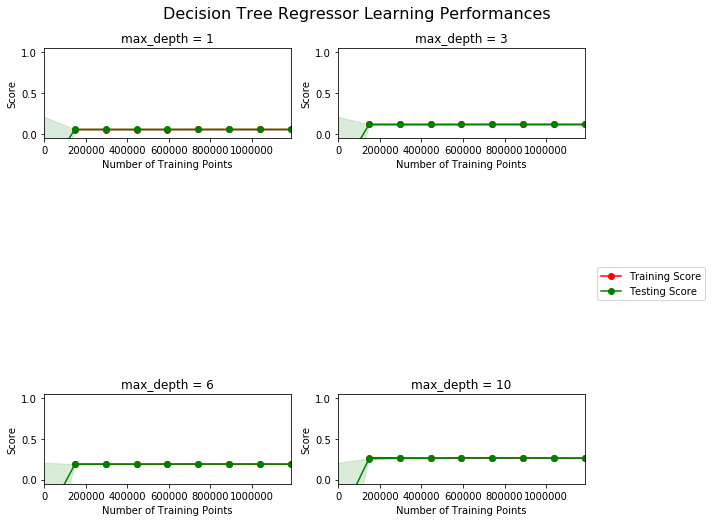

In [53]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(X,y)


### COMMENT HERE ABOUT THE GRAPHS 

### Random Forest Regressor 

We are going to utilize Random Forest as the next Machine Learning Model. 

In [55]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 500 decision trees # n_estimators = 500,
rf = RandomForestRegressor(random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [56]:
rf_predictions = rf.predict(X_test)

In [57]:
rf_predictions

array([2.07296779, 3.6105438 , 2.58686216, ..., 3.02343682, 2.18885184,
       2.90685236])

In [58]:
print(rf.feature_importances_)

[1.01652528e-01 4.05618385e-02 1.05287044e-02 ... 3.76788670e-06
 8.08861606e-04 1.47514077e-06]


In [59]:
print(rf.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [63]:
# One Hot Encoding
#features = pd.get_dummies(features)

# Extract features and labels
labels = df_new['price']   #Y 
features = df_new.drop('price', axis = 1)  #X (no price) 

# List of features for later use
feature_list = list(features.columns)

# Convert to numpy arrays
import numpy as np

features = np.array(features)
labels = np.array(labels)

# Training and Testing Sets
#from sklearn.model_selection import train_test_split

#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                           # test_size = 0.25, random_state = 42)

In [64]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance  
feature_importances = [(feature , round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]



Variable: shipping             Importance: 0.1
Variable: noname               Importance: 0.06
Variable: 1                    Importance: 0.04
Variable: Shoes                Importance: 0.04
Variable: Cell Phones & Smartphones Importance: 0.03
Variable: Pants, Tights, Leggings Importance: 0.03
Variable: Women's Handbags     Importance: 0.03
Variable: Louis Vuitton        Importance: 0.02
Variable: Lululemon            Importance: 0.02
Variable: 2                    Importance: 0.01
Variable: 3                    Importance: 0.01
Variable: 4                    Importance: 0.01
Variable: Beauty               Importance: 0.01
Variable: Cameras & Photography Importance: 0.01
Variable: Cell Phones & Accessories Importance: 0.01
Variable: Coats & Jackets      Importance: 0.01
Variable: Computers & Tablets  Importance: 0.01
Variable: Consoles             Importance: 0.01
Variable: Dresses              Importance: 0.01
Variable: Jewelry              Importance: 0.01
Variable: Kids             

Variable: Mojo Moxy            Importance: 0.0
Variable: Mommy's Helper       Importance: 0.0
Variable: Monarchy             Importance: 0.0
Variable: Moncler              Importance: 0.0
Variable: Monet                Importance: 0.0
Variable: Mongoose             Importance: 0.0
Variable: Monistat             Importance: 0.0
Variable: Monopoly             Importance: 0.0
Variable: Monoprice            Importance: 0.0
Variable: Monoreno             Importance: 0.0
Variable: Monster              Importance: 0.0
Variable: Monster Cable        Importance: 0.0
Variable: Monteau              Importance: 0.0
Variable: Monterey Club        Importance: 0.0
Variable: Moon Boot            Importance: 0.0
Variable: Moon Collection      Importance: 0.0
Variable: Moose Mountain       Importance: 0.0
Variable: Moose Toys           Importance: 0.0
Variable: Mopar                Importance: 0.0
Variable: Mopas                Importance: 0.0
Variable: Morgan               Importance: 0.0
Variable: Mor

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

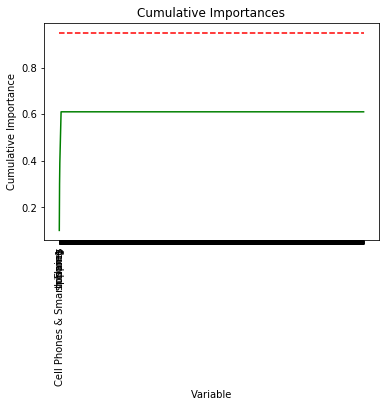

In [68]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
sorted_features_top10 = sorted_features[:5]
x_values = list(range(len(importances)))
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features_top10, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

Since a large number of features have feature_importance = 0.1, we only kept the top 5. 

#### Let's take a look at the error and accuracy of the model through Random Forest

In [69]:
# Make predictions on test data
#rf_predictions = rf.predict(X_test)

# Performance metrics
errors = abs(rf_predictions - y_test)

print('Metrics for Random Forest Trained on Data')
print('Average absolute error:', round(np.mean(errors), 4), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))

# Compare to baseline
#improvement_baseline = 100 * abs(mape - baseline_mape) / baseline_mape
#print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Data
Average absolute error: 0.4146 degrees.
Accuracy: 85.28 %.


As we see, this gives us an impressive accuracy of 85.28%, with the dafault hyperparameters in Random Forest Regressor model.

### Let's do a Grid Search to see if we can enhance our result

In [72]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict

In [73]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

Automatically created module for IPython interactive environment


In [76]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': (2,5,7,9),
            'n_estimators': (50,100,200,500,700),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [78]:
scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_absolute_error')

In [79]:
scores

array([-0.41451113, -0.41618847, -0.41538766, -0.41461181, -0.41597841,
       -0.41493691, -0.413988  , -0.41354819, -0.41537517, -0.41234598])

In [81]:
predictions = cross_val_predict(rf, X, y, cv=10)

In [82]:
predictions

array([2.41552322, 3.88391473, 2.34521003, ..., 2.9361573 , 2.53633696,
       3.03727394])

In [83]:
from sklearn import metrics

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))

Mean Absolute Error: 0.4145596617496129
Mean Squared Error: 0.3037150740618598
Root Mean Squared Error: 0.5511035057608142


# Conclusions

In this project, we investigated the odds of predicting the log of the price in the Mercari online marketplace based on different attributes, such as item condition (New With Tags, New, Used, etc.) as well as shipping type (paid by the seller or buyer) and brand name. We used several visualization tools in order to look into our dataset. We saw that the log of the price is normally distributed as opposed to the price itself. We then started the Machine Learning process by using Decision Tree Regressor and then Random ForestRegressor. Between the two models, Random Forest Regressor gave us the accuracy of 85.28%. 
<br />

The shortcomings in this dataset were that there was very little (almost none) correlation between the `item_condition` and the `price` so the `item_condition` attribute wasn't very effcetive in our prediction on `price`. Moreover, the `price` itself was rightly skewed so we predicted the log of the `price`. 